In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels
import sklearn
import matplotlib
import os

In [2]:
os.chdir('C:\\Users\\kirti\\Downloads')

#### 1.	Read the data as an appropriate Time Series data and plot the data.

In [3]:
df = pd.read_csv('Sparkling_1.csv',parse_dates=True,index_col='YearMonth')
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [4]:
df = df.rename(columns={"Sparkling": "Sparkling Monthly Sales"})

In [5]:
df.head()

,Sparkling Monthly Sales
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [6]:
print("The number of rows: ",df.shape[0], "\n""The number of columns: ",df.shape[1])

The number of rows:  187 
The number of columns:  1


In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

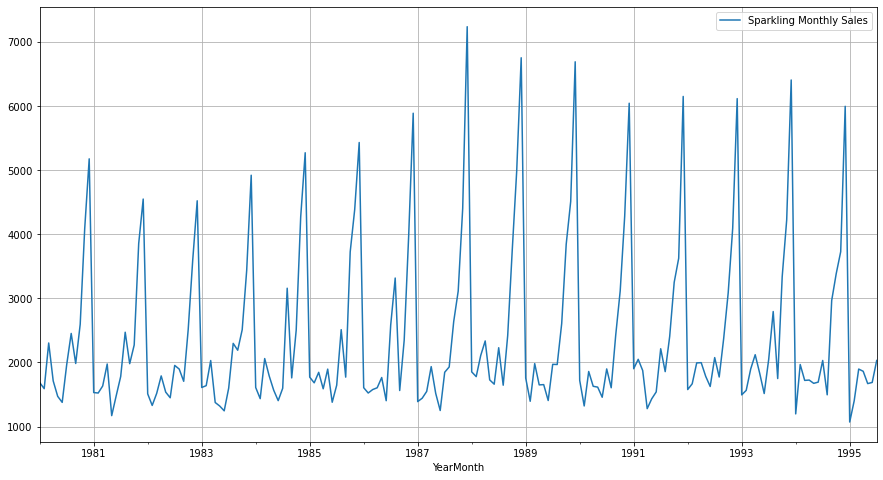

In [8]:
df.plot()
plt.grid();

#### 2. Perform Exploratory Data Analysis and Decomposition.

In [9]:
df.describe()

,Sparkling Monthly Sales
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Sparkling Monthly Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [11]:
df.isnull().sum()

Sparkling Monthly Sales    0
dtype: int64

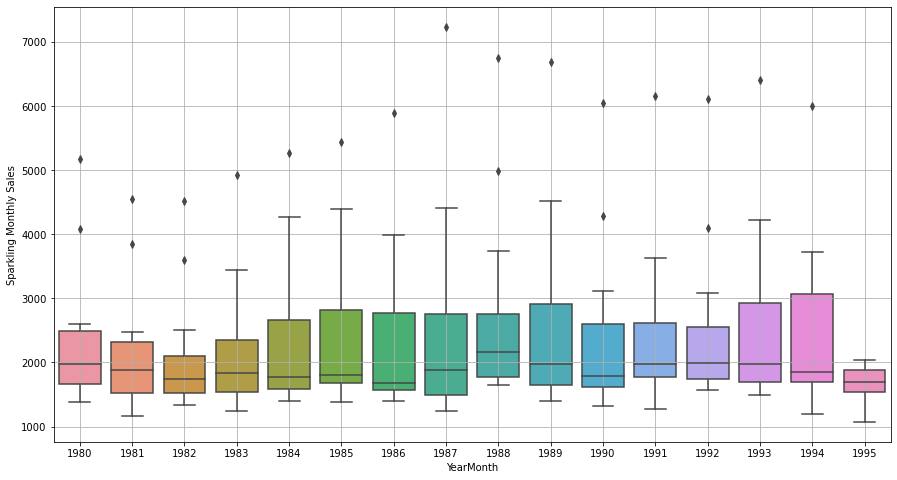

In [12]:
sns.boxplot(x = df.index.year,y = df['Sparkling Monthly Sales'])
plt.grid();

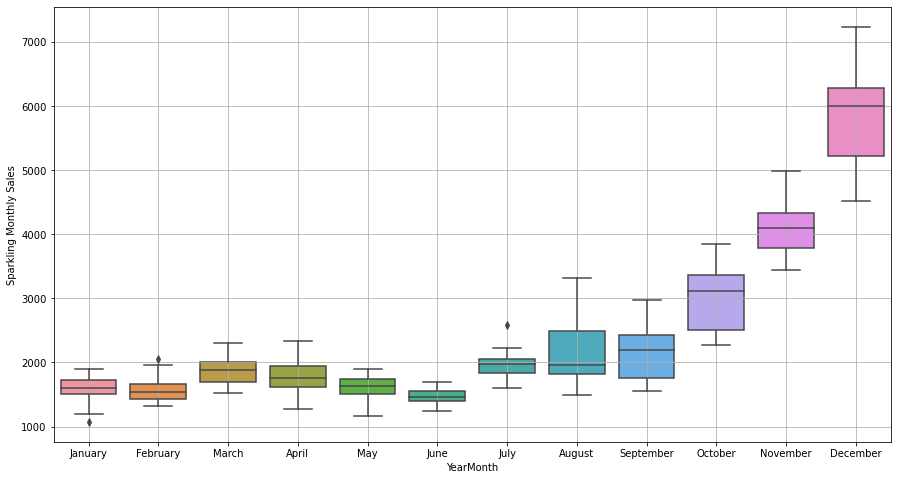

In [13]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling Monthly Sales'])
plt.grid();

In [14]:
from statsmodels.graphics.tsaplots import month_plot

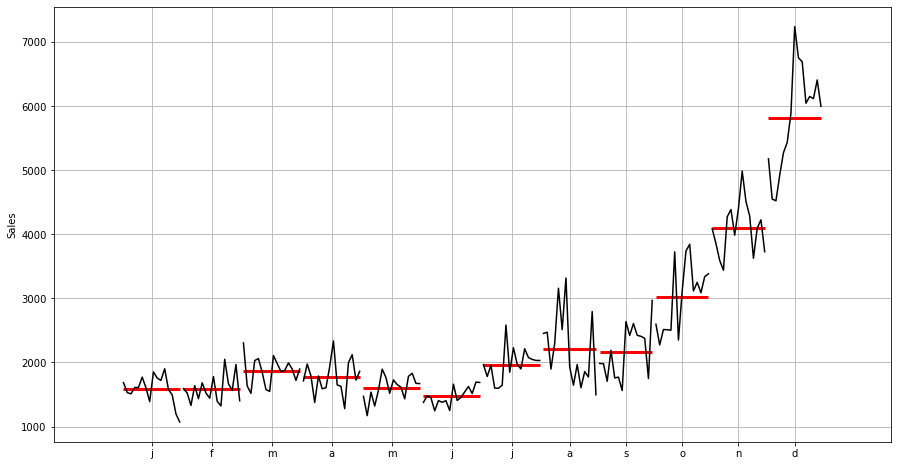

In [15]:
month_plot(df['Sparkling Monthly Sales'],ylabel='Sales')
plt.grid();

In [16]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling Monthly Sales', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


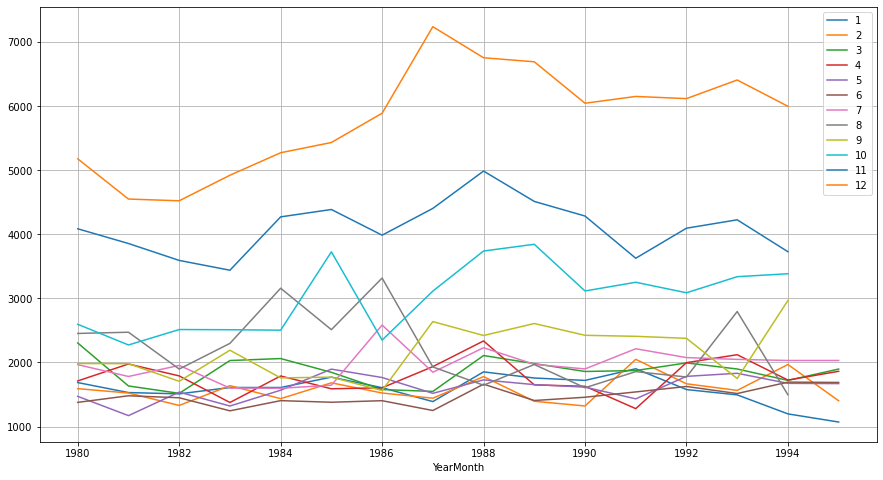

In [17]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

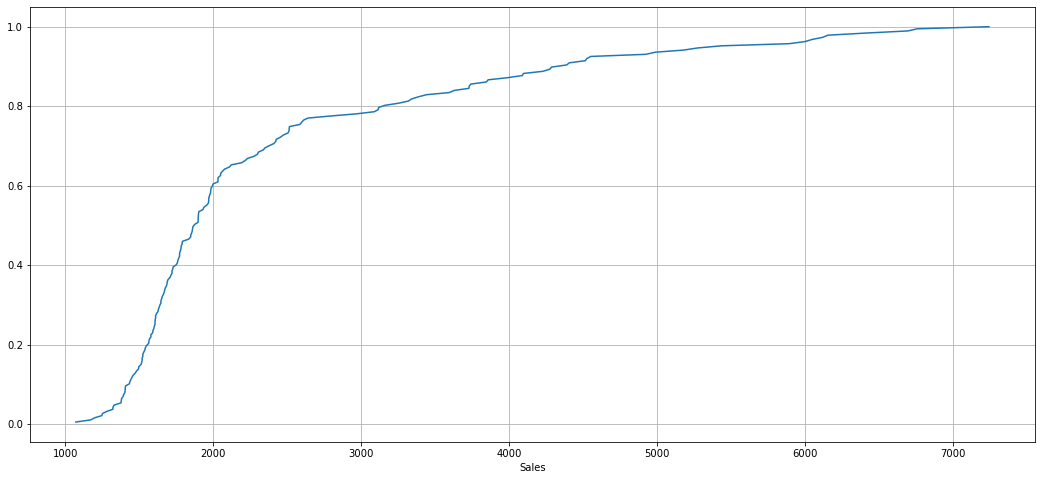

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling Monthly Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### Plot the average Sparkling Wine Sales per month and the month on month percentage change of Sparkling Wine Sales

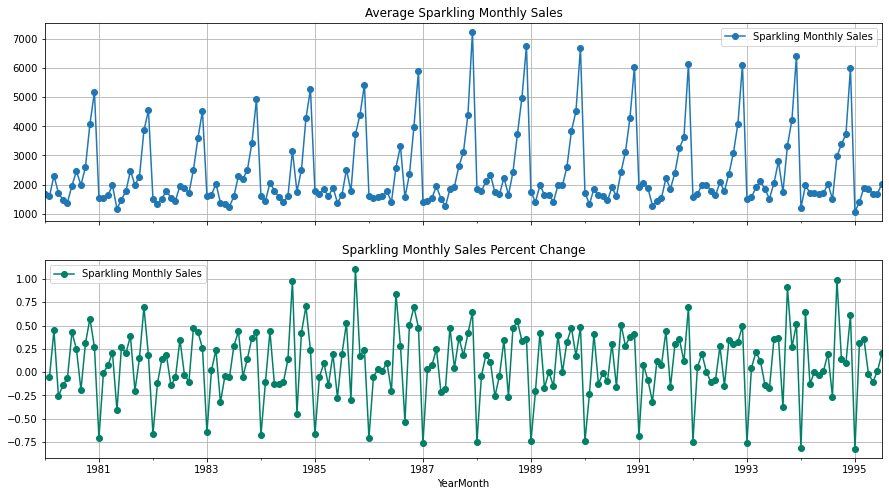

In [19]:
average    = df.groupby(df.index)["Sparkling Monthly Sales"].mean()
pct_change = df.groupby(df.index)["Sparkling Monthly Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Monthly Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Monthly Sales Percent Change",grid=True)

#### Decompose the Time Series and plot the different components

In [20]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

#### Additive Decomposition

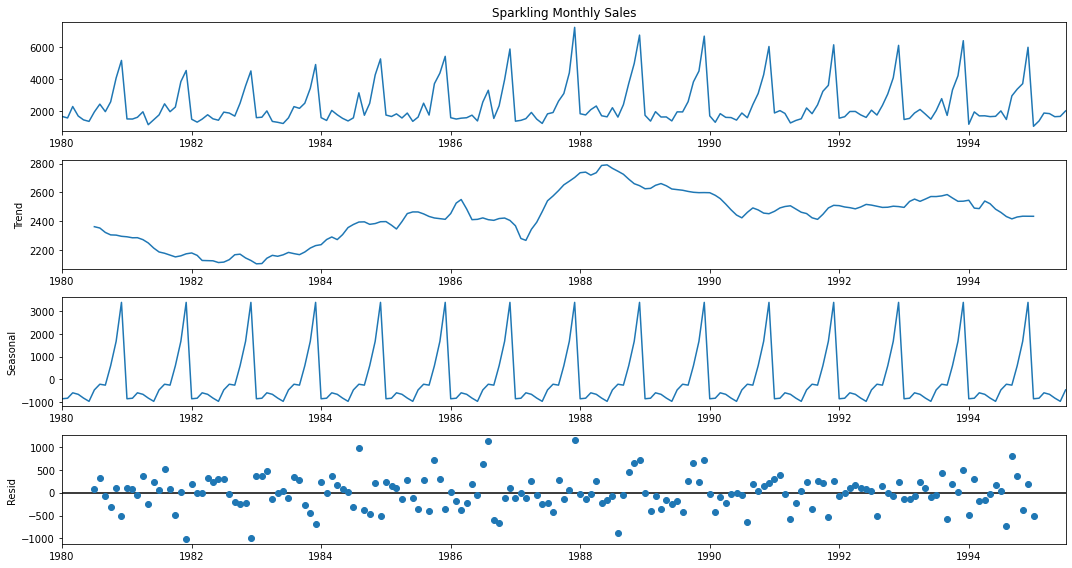

In [21]:
decomposition = seasonal_decompose(df['Sparkling Monthly Sales'],model='additive')
decomposition.plot();

In [22]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


#### Multiplicative Model

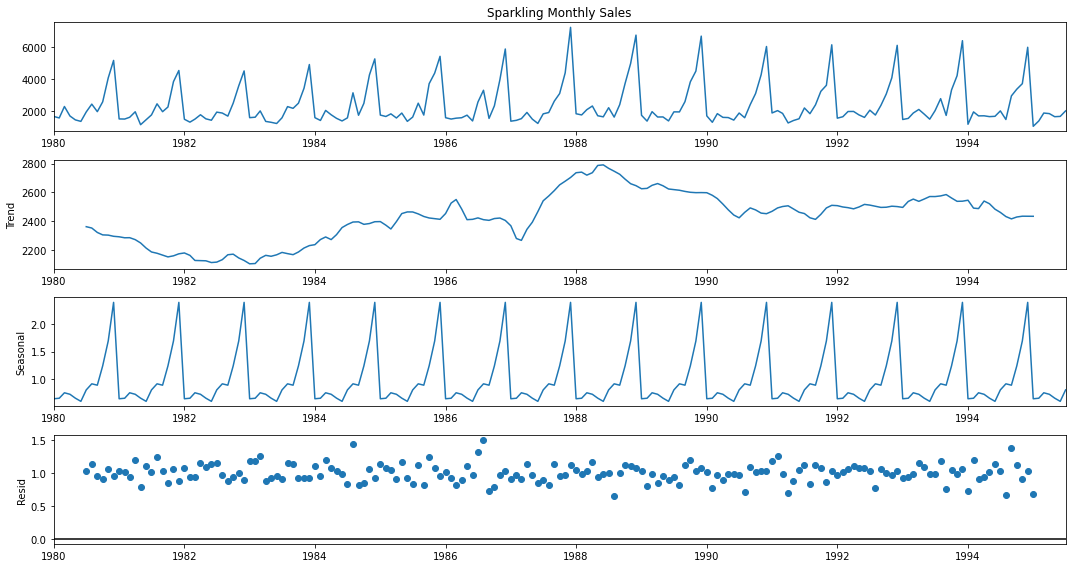

In [23]:
decomposition = seasonal_decompose(df['Sparkling Monthly Sales'],model='multiplicative')
decomposition.plot();

In [24]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

#### 3. Split the data into training and test. The test data should start in 1991.

In [25]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [26]:
from IPython.display import display

In [27]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling Monthly Sales
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling Monthly Sales
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


First few rows of Test Data


,Sparkling Monthly Sales
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


Last few rows of Test Data


,Sparkling Monthly Sales
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [28]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


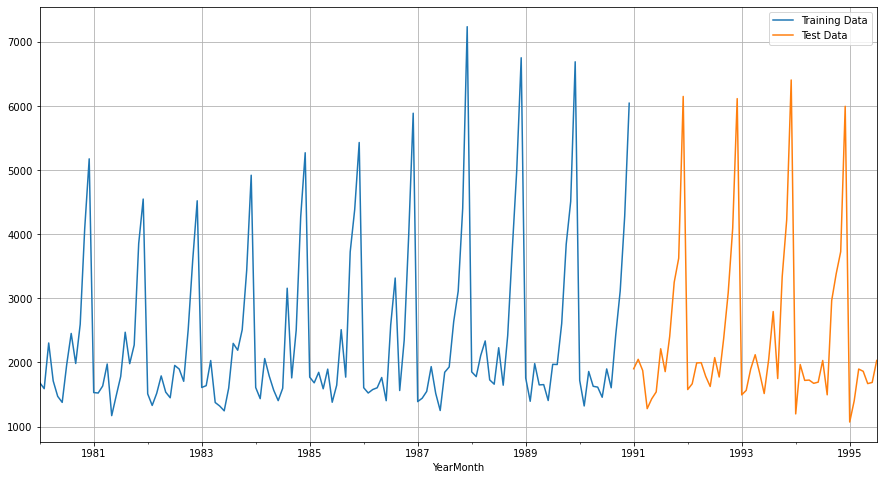

In [29]:
train['Sparkling Monthly Sales'].plot()
test['Sparkling Monthly Sales'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

#### 4. Build various Models and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [30]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [31]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [32]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling Monthly Sales  time
YearMonth                                
1980-01-01                     1686     1
1980-02-01                     1591     2
1980-03-01                     2304     3
1980-04-01                     1712     4
1980-05-01                     1471     5 

Last few rows of Training Data 
             Sparkling Monthly Sales  time
YearMonth                                
1990-08-01                     1605   128
1990-09-01                     2424   129
1990-10-01                     3116   130
1990-11-01                     4286   131
1990-12-01                     6047   132 

First few rows of Test Data 
             Sparkling Monthly Sales  time
YearMonth                                
1991-01-01                     1902   133
1991-02-01                     2049   134
1991-03-01                     1874   135
1991-04-01                     1279   136
1991-05-01                     1432   137 

Last few rows o

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling Monthly Sales'].values)

LinearRegression()

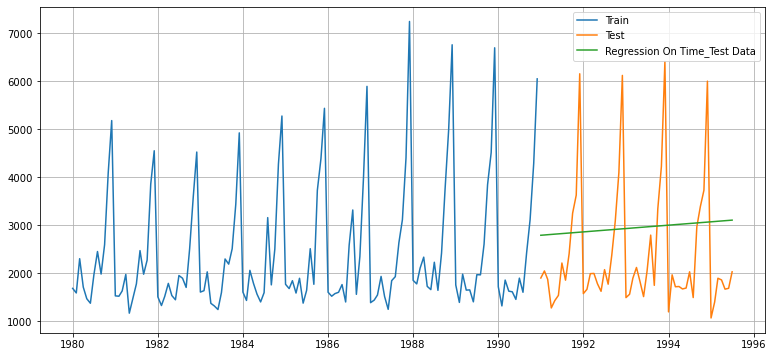

In [36]:
model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] =model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling Monthly Sales'], label='Train')
plt.plot(test['Sparkling Monthly Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation 

In [37]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling Monthly Sales'],model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


### Model 2: Naive Approach: 𝑦̂ 𝑡+1=𝑦𝑡


In [39]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [40]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling Monthly Sales'])[len(np.asarray(train['Sparkling Monthly Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

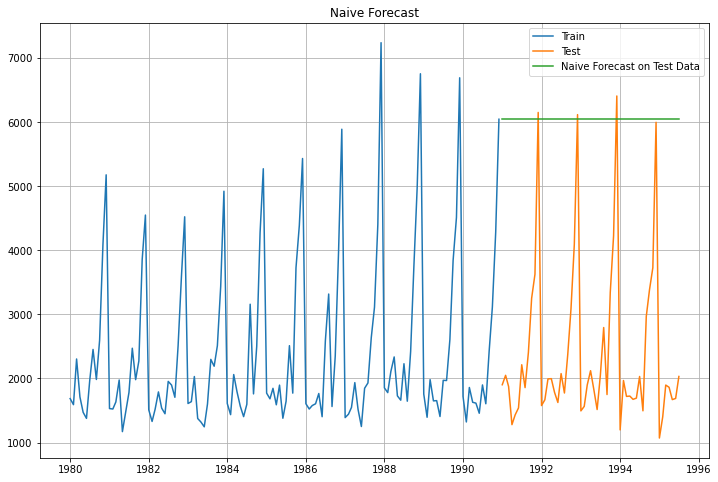

In [41]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling Monthly Sales'], label='Train')
plt.plot(test['Sparkling Monthly Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### MOdel Evaluation

In [42]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling Monthly Sales'],NaiveModel_test['naive'],squared=False)
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive Model forecast on the Test Data,  RMSE is 3864.279


In [43]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


### Model 3: Simple Average

In [44]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [45]:
SimpleAverage_test['mean_forecast'] = train['Sparkling Monthly Sales'].mean()
SimpleAverage_test.head()

,Sparkling Monthly Sales,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


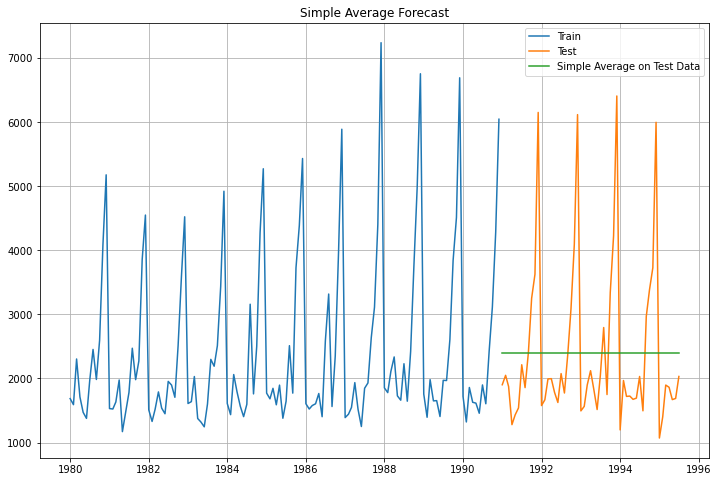

In [46]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling Monthly Sales'], label='Train')
plt.plot(SimpleAverage_test['Sparkling Monthly Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [47]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling Monthly Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [48]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


### Model 4: Moving Average

In [49]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling Monthly Sales
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


#### Trailing Moving Averages

In [50]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling Monthly Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling Monthly Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling Monthly Sales'].rolling(6).mean()


MovingAverage.head()

,Sparkling Monthly Sales,Trailing_2,Trailing_4,Trailing_6
YearMonth,,,,
1980-01-01,1686,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN
1980-05-01,1471,1591.5,1769.50,NaN


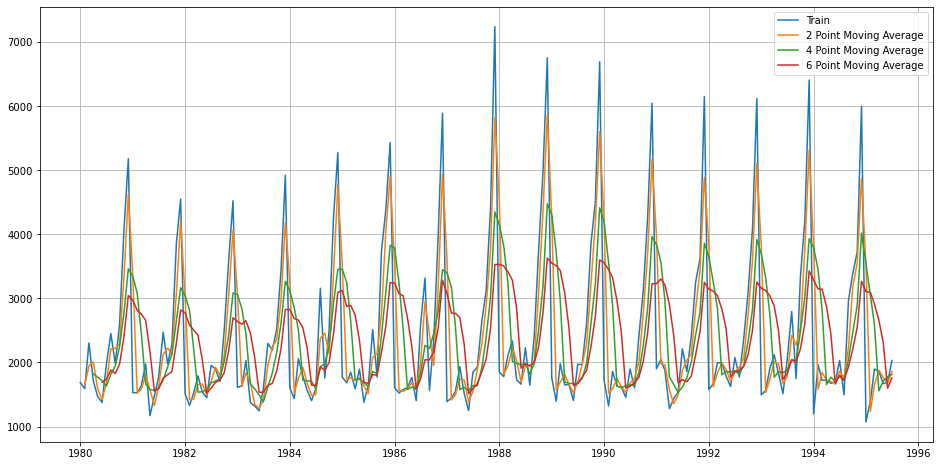

In [51]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling Monthly Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [52]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

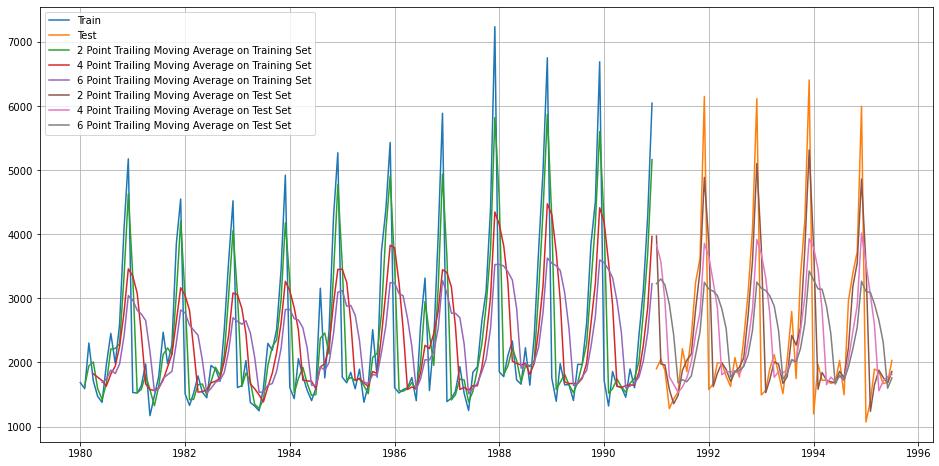

In [53]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling Monthly Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling Monthly Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation Test Data

In [138]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling Monthly Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling Monthly Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling Monthly Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927


In [55]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428


### Model 5: Simple Exponential Smoothing

In [56]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [57]:
SES_train = train.copy()
SES_test = test.copy()

In [58]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling Monthly Sales'])

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [59]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [60]:
model_SES_autofit.params

{'smoothing_level': 0.04960659880745982,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [61]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling Monthly Sales,predict
YearMonth,,
1991-01-01,1902,2724.929339
1991-02-01,2049,2724.929339
1991-03-01,1874,2724.929339
1991-04-01,1279,2724.929339
1991-05-01,1432,2724.929339


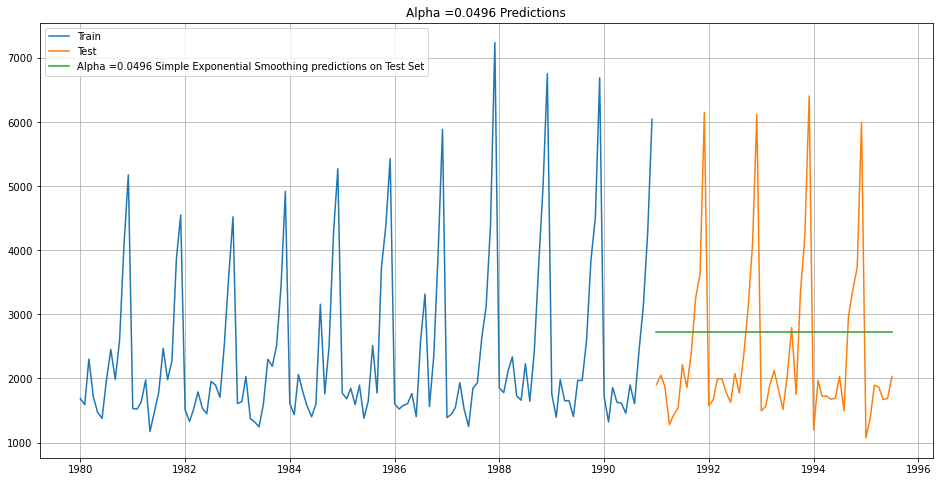

In [62]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling Monthly Sales'], label='Train')
plt.plot(SES_test['Sparkling Monthly Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions');

#### Model Evaluation for 𝛼= 0.0496 : Simple Exponential Smoothing

In [63]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling Monthly Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [64]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0496,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
"Alpha=0.0496,SimpleExponentialSmoothing",1316.034674


### Model 6: Double Exponential Smoothing (Holt's Model)

In [65]:
DES_train = train.copy()
DES_test = test.copy()

In [66]:
model_DES = Holt(DES_train['Sparkling Monthly Sales'])

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [67]:
model_DES = model_DES.fit()
print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6885714285714285, 'smoothing_trend': 9.999999999999999e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1686.0, 'initial_trend': -95.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [68]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5221.278699
1991-02-01    5127.886554
1991-03-01    5034.494409
1991-04-01    4941.102264
1991-05-01    4847.710119
1991-06-01    4754.317974
1991-07-01    4660.925829
1991-08-01    4567.533684
1991-09-01    4474.141539
1991-10-01    4380.749394
1991-11-01    4287.357249
1991-12-01    4193.965104
1992-01-01    4100.572959
1992-02-01    4007.180813
1992-03-01    3913.788668
1992-04-01    3820.396523
1992-05-01    3727.004378
1992-06-01    3633.612233
1992-07-01    3540.220088
1992-08-01    3446.827943
1992-09-01    3353.435798
1992-10-01    3260.043653
1992-11-01    3166.651508
1992-12-01    3073.259363
1993-01-01    2979.867218
1993-02-01    2886.475073
1993-03-01    2793.082928
1993-04-01    2699.690783
1993-05-01    2606.298638
1993-06-01    2512.906493
1993-07-01    2419.514348
1993-08-01    2326.122203
1993-09-01    2232.730058
1993-10-01    2139.337913
1993-11-01    2045.945768
1993-12-01    1952.553623
1994-01-01    1859.161478
1994-02-01    1765.769333
1994-03-01  

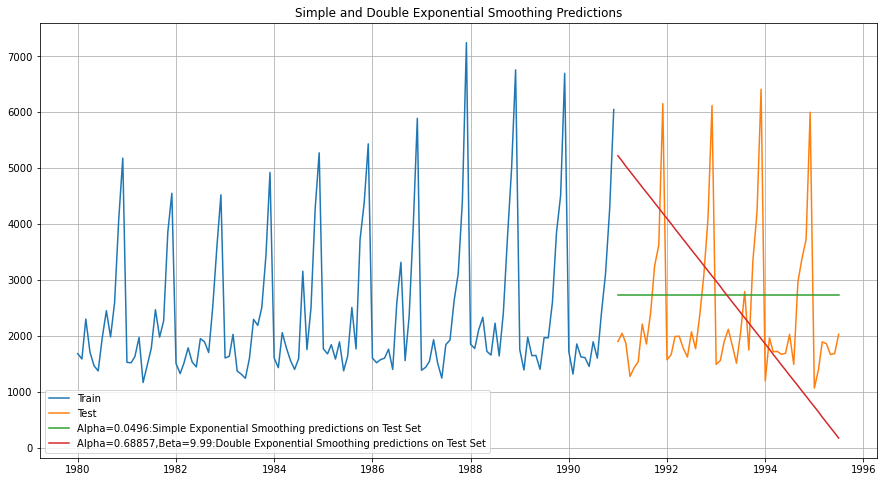

In [69]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.0496:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.68857,Beta=9.99:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

#### Double Exponential Model Tuning

In [70]:
model_DES1= Holt(DES_train['Sparkling Monthly Sales']).fit(smoothing_level=0.01,smoothing_trend=0.001)

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [71]:
DES_train['predict_i'] = model_DES1.fittedvalues
DES_test['predict_j'] = model_DES1.forecast(len(test))

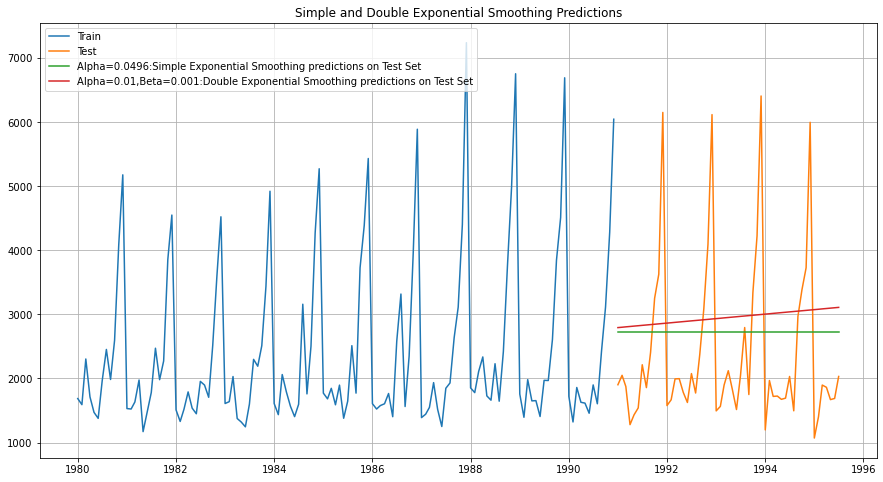

In [72]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.0496:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict_j'], label='Alpha=0.01,Beta=0.001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

#### Model Evaluation

In [73]:
print('DES RMSE:',metrics.mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 2007.238525758568


In [74]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.68857,Beta=9.99-e:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
"Alpha=0.0496,SimpleExponentialSmoothing",1316.034674
"Alpha=0.68857,Beta=9.99-e:DES",2007.238526


In [75]:
print('DES RMSE:',metrics.mean_squared_error(test.values,DES_test['predict_j'].values,squared=False))

DES RMSE: 1390.2105111956175


In [76]:
resultsDf_model6_2 = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,DES_test['predict_j'].values,squared=False)]}
                           ,index=['Alpha=0.01,Beta=0.001:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_model6_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
"Alpha=0.0496,SimpleExponentialSmoothing",1316.034674
"Alpha=0.68857,Beta=9.99-e:DES",2007.238526
"Alpha=0.01,Beta=0.001:DES",1390.210511


### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [77]:
TES_train = train.copy()
TES_test = test.copy()

In [78]:
model_TES = ExponentialSmoothing(TES_train['Sparkling Monthly Sales'],trend='additive',seasonal='multiplicative')

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [79]:
model_TES_autofit = model_TES.fit()

In [80]:
model_TES_autofit.params

{'smoothing_level': 0.11110109539432127,
 'smoothing_trend': 0.06155956038741422,
 'smoothing_seasonal': 0.39402402538387826,
 'damping_trend': nan,
 'initial_level': 1637.1063954979618,
 'initial_trend': -9.145552698252029,
 'initial_seasons': array([1.05835222, 1.01510513, 1.40303179, 1.19830843, 0.96806777,
        0.97034883, 1.32237078, 1.70460903, 1.37084089, 1.80737708,
        2.83425686, 3.61646361]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling Monthly Sales,auto_predict
YearMonth,,
1991-01-01,1902,1577.385874
1991-02-01,2049,1334.197640
1991-03-01,1874,1746.249213
1991-04-01,1279,1630.969624
1991-05-01,1432,1523.583186


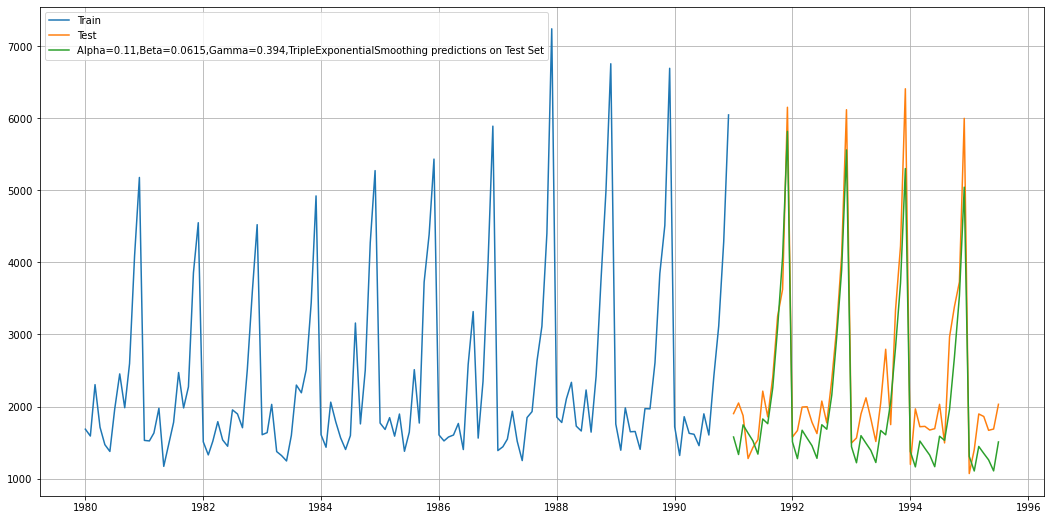

In [82]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling Monthly Sales'], label='Train')
plt.plot(TES_test['Sparkling Monthly Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.11,Beta=0.0615,Gamma=0.394,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [83]:
rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Sparkling Monthly Sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.11,Beta=0.0615,Gamma=0.394, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.11,Beta=0.0615,Gamma=0.394, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 468.758


In [84]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['Alpha=0.11,Beta=0.0615,Gamma=0.394,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
"Alpha=0.0496,SimpleExponentialSmoothing",1316.034674
"Alpha=0.68857,Beta=9.99-e:DES",2007.238526
"Alpha=0.01,Beta=0.001:DES",1390.210511
"Alpha=0.11,Beta=0.0615,Gamma=0.394,TripleExponentialSmoothing",468.758362


#### TES Model Tuning

In [85]:
model_TES_fit = model_TES.fit(smoothing_level=0.15,smoothing_trend=0.01,smoothing_seasonal=0.371)

In [86]:
TES_train['predict_i'] = model_TES_fit.fittedvalues
TES_test['predict_j'] = model_TES_fit.forecast(len(test))

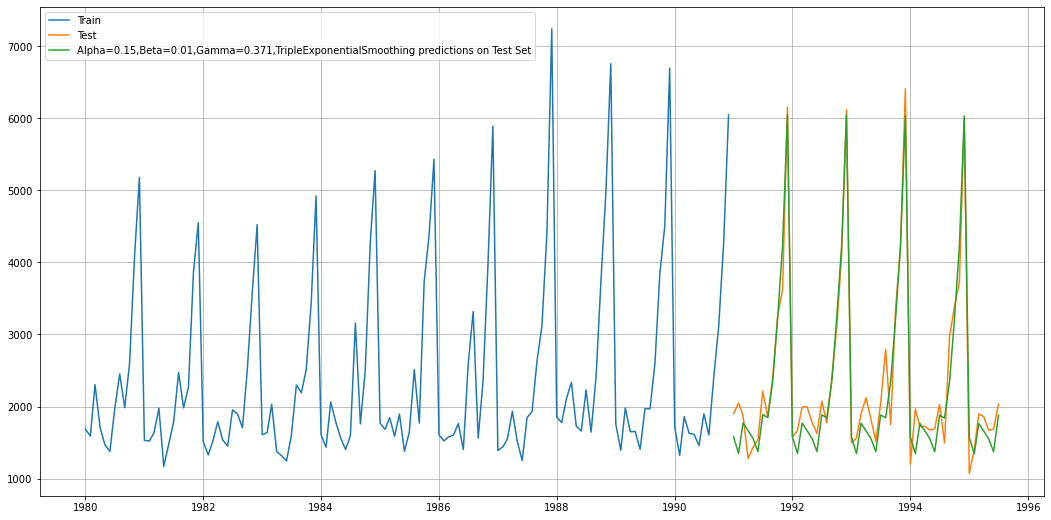

In [87]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling Monthly Sales'], label='Train')
plt.plot(TES_test['Sparkling Monthly Sales'], label='Test')

plt.plot(TES_test['predict_j'], label='Alpha=0.15,Beta=0.01,Gamma=0.371,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [88]:
rmse_model7_test_2 = metrics.mean_squared_error(TES_test['Sparkling Monthly Sales'],TES_test['predict_j'],squared=False)
print("For Alpha=0.15,Beta=0.01,Gamma=0.371, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_2))

For Alpha=0.15,Beta=0.01,Gamma=0.371, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 315.965


In [89]:
resultsDf_7_2 = pd.DataFrame({'Test RMSE': [rmse_model7_test_2]}
                           ,index=['Alpha=0.15,Beta=0.01,Gamma=0.371,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
"Alpha=0.0496,SimpleExponentialSmoothing",1316.034674
"Alpha=0.68857,Beta=9.99-e:DES",2007.238526
"Alpha=0.01,Beta=0.001:DES",1390.210511
"Alpha=0.11,Beta=0.0615,Gamma=0.394,TripleExponentialSmoothing",468.758362


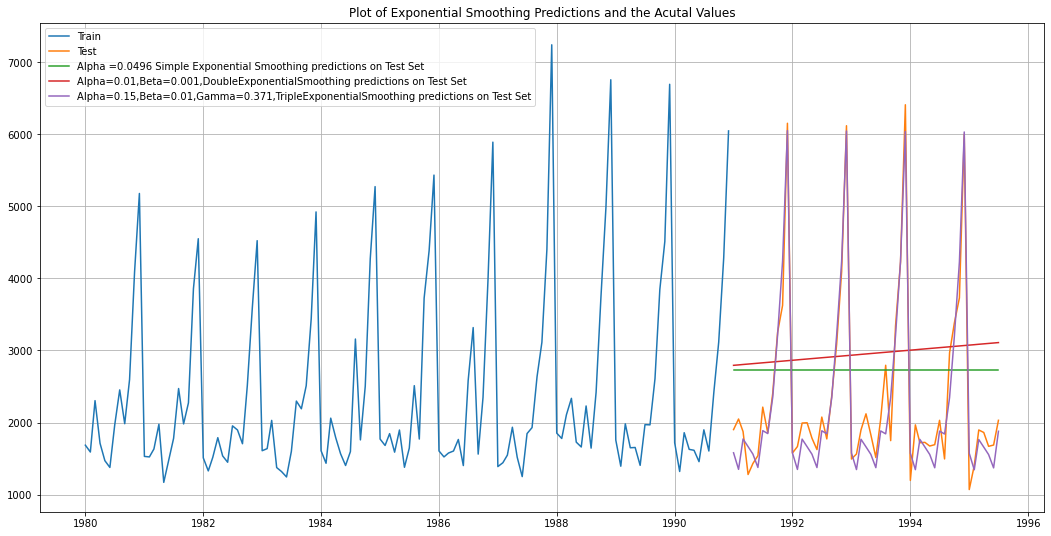

In [90]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling Monthly Sales'], label='Train')
plt.plot(test['Sparkling Monthly Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict_j'], label='Alpha=0.01,Beta=0.001,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict_j'], label='Alpha=0.15,Beta=0.01,Gamma=0.371,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

#### 5. Checking the Stationarity of the Data 

In [91]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

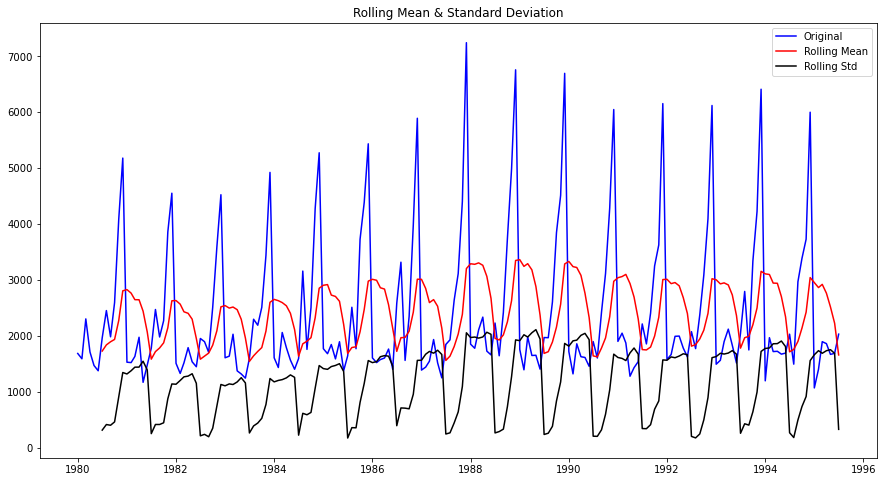

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [92]:
test_stationarity(df['Sparkling Monthly Sales'])

##### We see that at 5% significant level the Time Series is non-stationary.

##### Let us take a difference of order 1 and check whether the Time Series is stationary or not

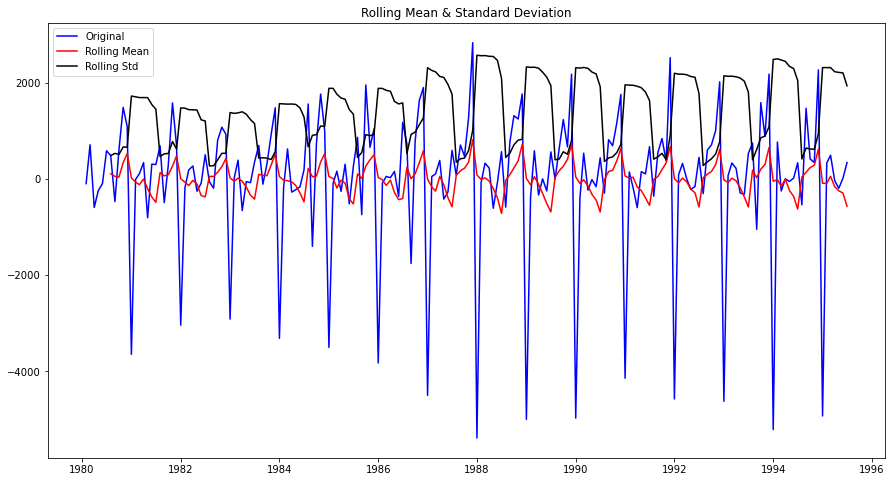

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [93]:
test_stationarity(df['Sparkling Monthly Sales'].diff().dropna())

##### 6. Build an automated version of the ARIMA/SARIMA model using the lowest AIC

#### ARIMA Model

In [94]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [95]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [96]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling Monthly Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.90643726763
ARIMA(0, 1, 2) - AIC:2232.7830976842542
ARIMA(1, 1, 0) - AIC:2268.5280605652692
ARIMA(1, 1, 1) - AIC:2235.013945349191
ARIMA(1, 1, 2) - AIC:2233.5976471196204
ARIMA(2, 1, 0) - AIC:2262.0356005526905
ARIMA(2, 1, 1) - AIC:2232.3604898860826
ARIMA(2, 1, 2) - AIC:2210.624978453035


C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [97]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.624978
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035601
1,"(0, 1, 1)",2264.906437
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [98]:
auto_ARIMA = ARIMA(train['Sparkling Monthly Sales'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                                 ARIMA Model Results                                 
Dep. Variable:     D.Sparkling Monthly Sales   No. Observations:                  131
Model:                        ARIMA(2, 1, 2)   Log Likelihood               -1099.312
Method:                              css-mle   S.D. of innovations           1013.702
Date:                       Sat, 14 Aug 2021   AIC                           2210.625
Time:                               19:10:50   BIC                           2227.876
Sample:                           02-01-1980   HQIC                          2217.635
                                - 12-01-1990                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               5.5842      0.519     10.755      0.000       4.567       6.602
ar.L1.D.Spar

#### Predict on the Test Set using this model and evaluate the model.

In [99]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [100]:
from sklearn.metrics import  mean_squared_error
ARIMArmse = mean_squared_error(test['Sparkling Monthly Sales'],predicted_auto_ARIMA[0],squared=False)
print(ARIMArmse)

1374.0485178912852


In [101]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [ARIMArmse]}
                           ,index=['AUTO_ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
"Alpha=0.0496,SimpleExponentialSmoothing",1316.034674
"Alpha=0.68857,Beta=9.99-e:DES",2007.238526
"Alpha=0.01,Beta=0.001:DES",1390.210511
"Alpha=0.11,Beta=0.0615,Gamma=0.394,TripleExponentialSmoothing",468.758362


#### SARIMA Model

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

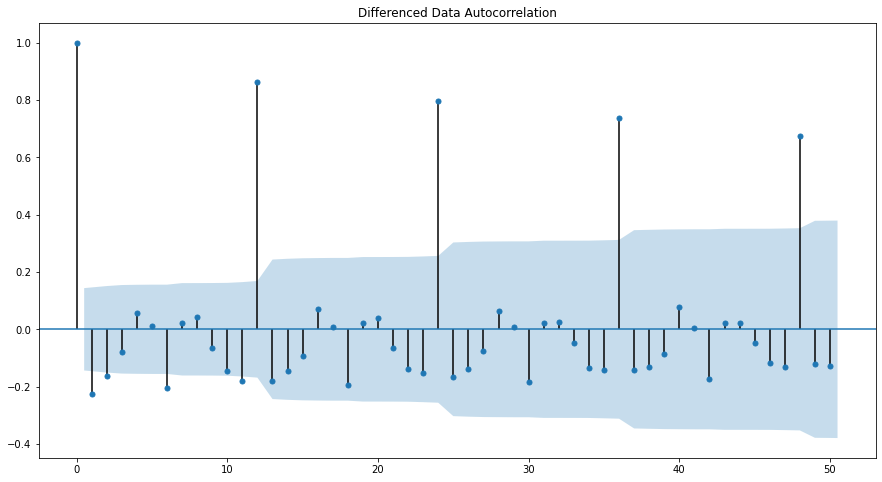

In [103]:
plot_acf(df['Sparkling Monthly Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

##### Setting the seasonality as 12 for the iteration of the auto SARIMA model.

In [104]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [105]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [106]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling Monthly Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616843948
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235398
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301373185
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735940103
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054160642094
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805450985
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649611466
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089574770212
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881792787
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0973022225678
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319652361758
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954504864
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245086517842
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683740412841
SARIMA(0, 1

In [107]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584250
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.080254
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121564
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160319
80,"(2, 1, 2)","(2, 0, 2, 12)",1557.678491


In [108]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling Monthly Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sat, 14 Aug 2021   AIC                           1555.584
Time:                                    19:12:18   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6280      0.255     -2.461      0.014      -1.128      -0.128
ma.L1         -0.1042      0.225   

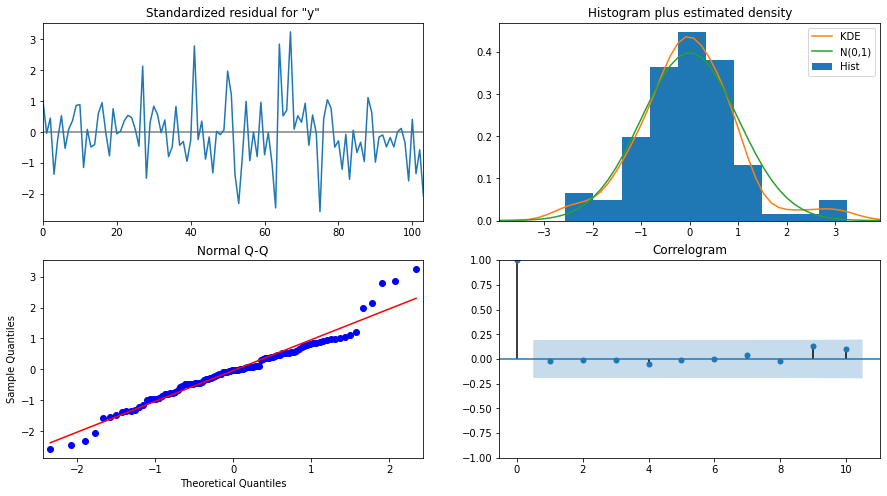

In [109]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

##### Predict on the Test Set using this model and evaluate the model.

In [110]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [111]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.342726,388.358724,566.173613,2088.511838
1,1315.066181,402.029943,527.101973,2103.030389
2,1621.597317,402.023553,833.645632,2409.549001
3,1598.808550,407.260743,800.592162,2397.024938
4,1392.708619,407.991444,593.060082,2192.357156


In [112]:
SARIMArmse = mean_squared_error(test['Sparkling Monthly Sales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(SARIMArmse)

528.6433969604329


In [113]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [SARIMArmse]}
                           ,index=['AUTO_SARIMA(1,1,2)(1,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
"Alpha=0.0496,SimpleExponentialSmoothing",1316.034674
"Alpha=0.68857,Beta=9.99-e:DES",2007.238526
"Alpha=0.01,Beta=0.001:DES",1390.210511
"Alpha=0.11,Beta=0.0615,Gamma=0.394,TripleExponentialSmoothing",468.758362


#### 7.	Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF 

#### ACF and PACF for ARIMA Model

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


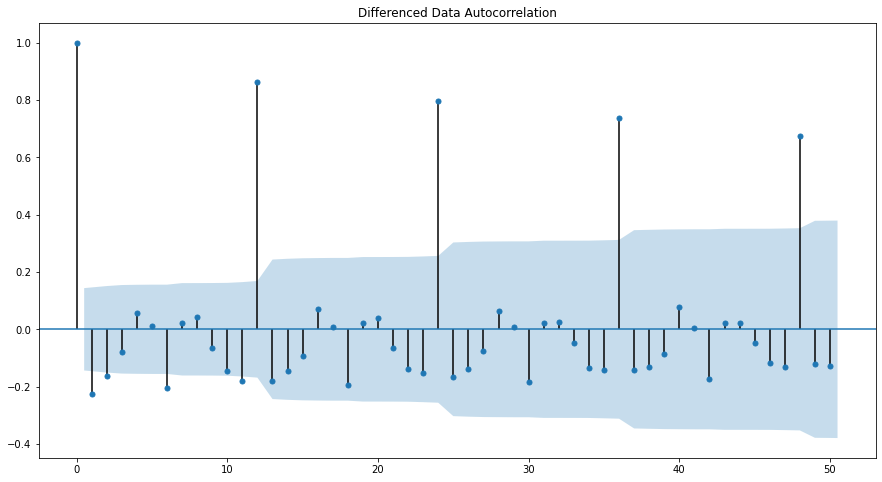

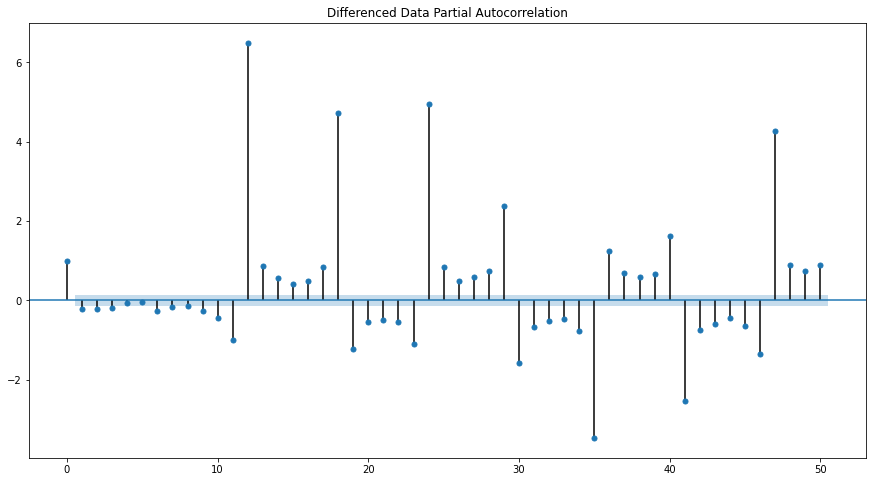

In [114]:
plot_acf(df['Sparkling Monthly Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling Monthly Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [115]:
manual_ARIMA = ARIMA(train['Sparkling Monthly Sales'], order=(1,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                                 ARIMA Model Results                                 
Dep. Variable:     D.Sparkling Monthly Sales   No. Observations:                  131
Model:                        ARIMA(1, 1, 1)   Log Likelihood               -1113.507
Method:                              css-mle   S.D. of innovations           1171.377
Date:                       Sat, 14 Aug 2021   AIC                           2235.014
Time:                               19:12:21   BIC                           2246.515
Sample:                           02-01-1980   HQIC                          2239.687
                                - 12-01-1990                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               6.7491      4.616      1.462      0.144      -2.299      15.797
ar.L1.D.Spar

#### Predict on the Test Set using this model and evaluate the model.

In [116]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [117]:
rmseARIMA = mean_squared_error(test['Sparkling Monthly Sales'],predicted_manual_ARIMA[0],squared=False)
print(rmseARIMA)

1461.6709390776164


In [118]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmseARIMA]}
                           ,index=['MANUAL_ARIMA(1,1,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
"Alpha=0.0496,SimpleExponentialSmoothing",1316.034674
"Alpha=0.68857,Beta=9.99-e:DES",2007.238526
"Alpha=0.01,Beta=0.001:DES",1390.210511
"Alpha=0.11,Beta=0.0615,Gamma=0.394,TripleExponentialSmoothing",468.758362


#### ACF and PACF for SARIMA Model

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


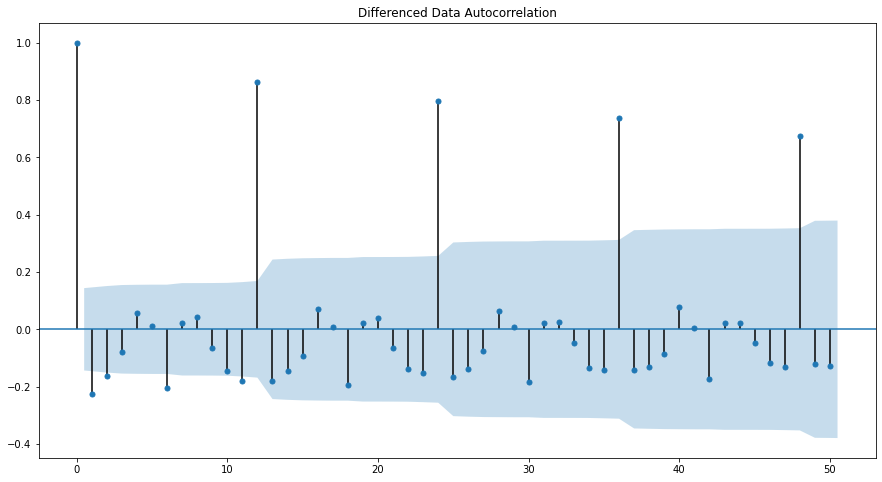

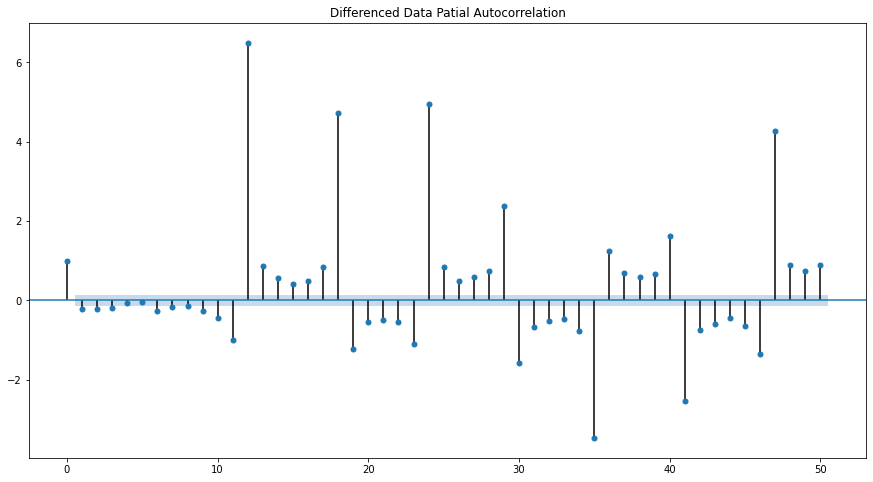

In [119]:
plot_acf(df['Sparkling Monthly Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling Monthly Sales'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

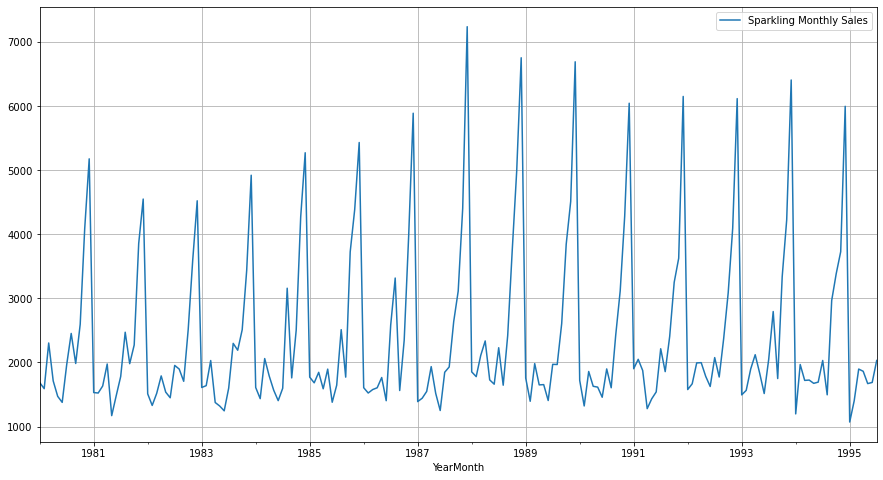

In [120]:
df.plot()
plt.grid();

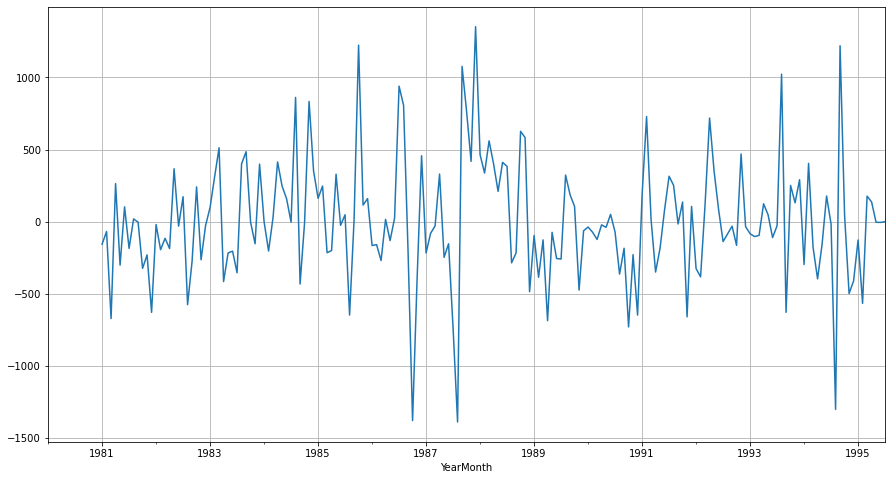

In [121]:
(df['Sparkling Monthly Sales'].diff(12)).plot()
plt.grid();

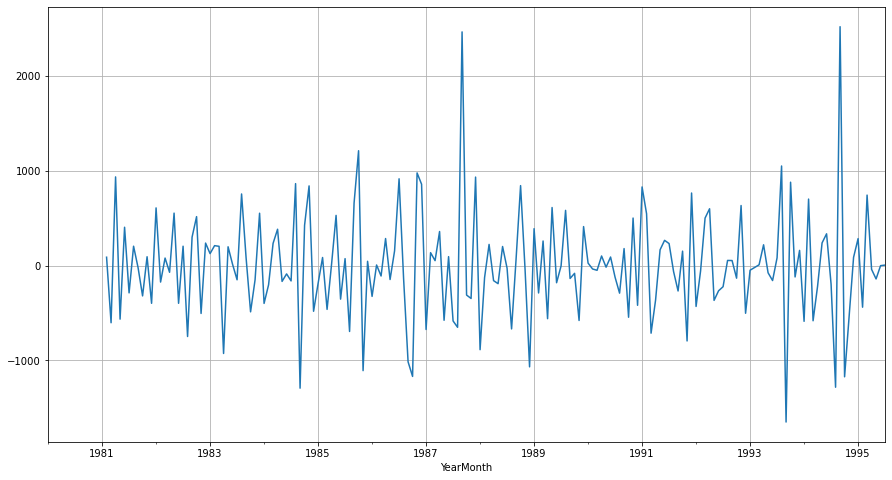

In [122]:
(df['Sparkling Monthly Sales'].diff(12)).diff().plot()
plt.grid();

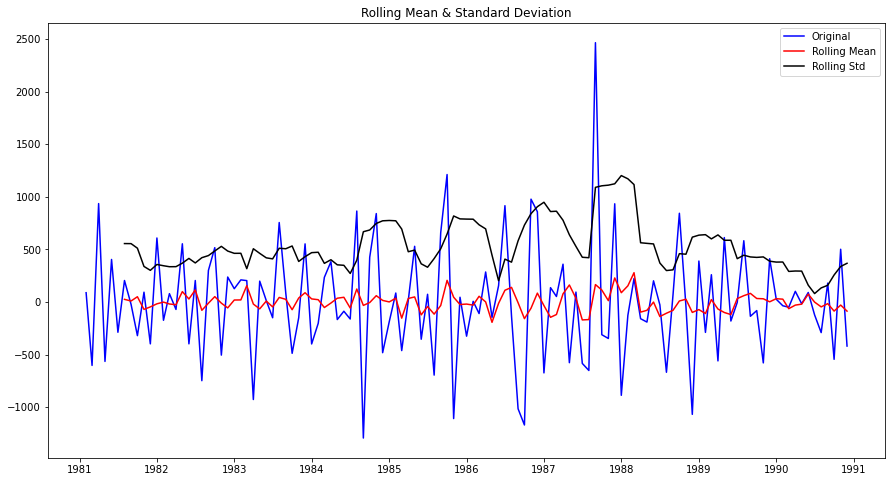

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [123]:
test_stationarity((train['Sparkling Monthly Sales'].diff(12).dropna()).diff(1).dropna())

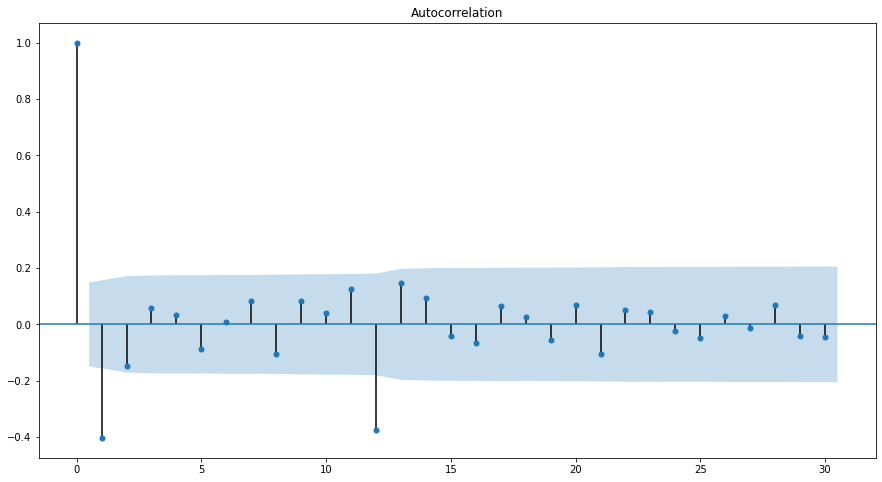

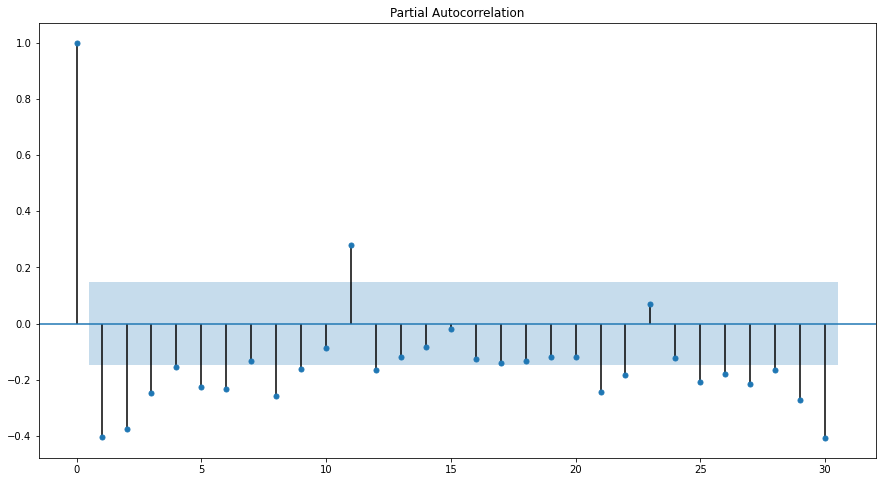

In [124]:
plot_acf((df['Sparkling Monthly Sales'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling Monthly Sales'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [125]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling Monthly Sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -780.336
Date:                            Sat, 14 Aug 2021   AIC                           1570.672
Time:                                    19:12:25   BIC                           1583.942
Sample:                                         0   HQIC                          1576.050
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1661      0.120      1.388      0.165      -0.068       0.401
ma.L1         -0.9398      0.057   

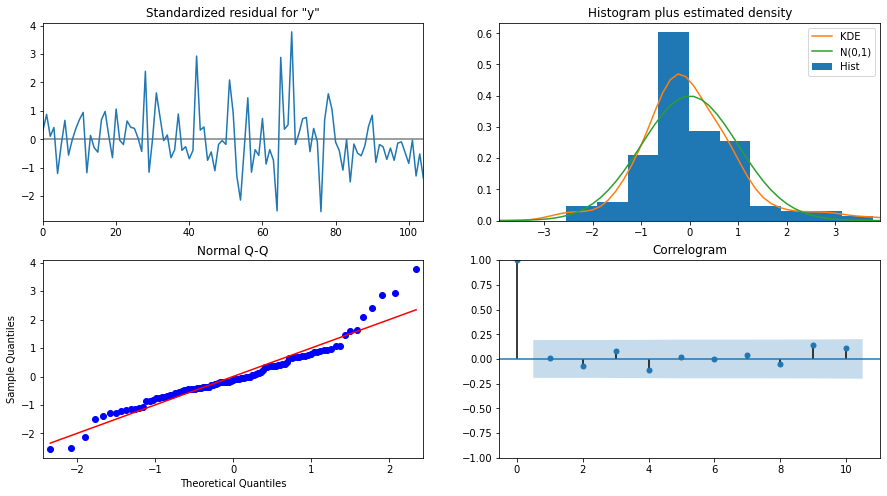

In [126]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [127]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [128]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1548.263868,407.071597,750.418198,2346.109538
1,1304.635611,417.365234,486.614784,2122.656439
2,1815.752526,419.259893,994.018236,2637.486816
3,1641.778874,420.413698,817.783168,2465.774580
4,1552.023529,421.460266,725.976586,2378.070472


In [129]:
rmseSARIMA = mean_squared_error(test['Sparkling Monthly Sales'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmseSARIMA)

375.6785552245627


In [130]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmseSARIMA]}
                           ,index=['MANUAL_SARIMA(1,1,1)(1,1,1,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
"Alpha=0.0496,SimpleExponentialSmoothing",1316.034674
"Alpha=0.68857,Beta=9.99-e:DES",2007.238526
"Alpha=0.01,Beta=0.001:DES",1390.210511
"Alpha=0.11,Beta=0.0615,Gamma=0.394,TripleExponentialSmoothing",468.758362


#### 8.	Table with all the models built along with their corresponding parameters and the respective RMSE values on the test data. 

In [139]:
resultsDf.sort_values(by='Test RMSE',ascending=True)

,Test RMSE
"Alpha=0.15,Beta=0.01,Gamma=0.371,TripleExponentialSmoothing",315.964873
"MANUAL_SARIMA(1,1,1)(1,1,1,12)",375.678555
"Alpha=0.11,Beta=0.0615,Gamma=0.394,TripleExponentialSmoothing",468.758362
"AUTO_SARIMA(1,1,2)(1,0,2,12)",528.643397
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
SimpleAverageModel,1275.081804
6pointTrailingMovingAverage,1283.927428
"Alpha=0.0496,SimpleExponentialSmoothing",1316.034674
"AUTO_ARIMA(2,1,2)",1374.048518


#### 9. Build the Most Optimum Model on the Complete Data and Predict 12 months into the Future.



In [132]:
Full_Data_Model = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.15,
                                                                 smoothing_trend=0.01,
                                                                 smoothing_seasonal=0.371)

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [133]:
RMSE_Full_Data_Model = metrics.mean_squared_error(df['Sparkling Monthly Sales'],Full_Data_Model.fittedvalues,squared=False)

print('RMSE:',RMSE_Full_Data_Model)

RMSE: 356.4666637296787


### Evaluate the model on the whole and predict 12 months into the future.

In [134]:
prediction = Full_Data_Model.forecast(steps=12)

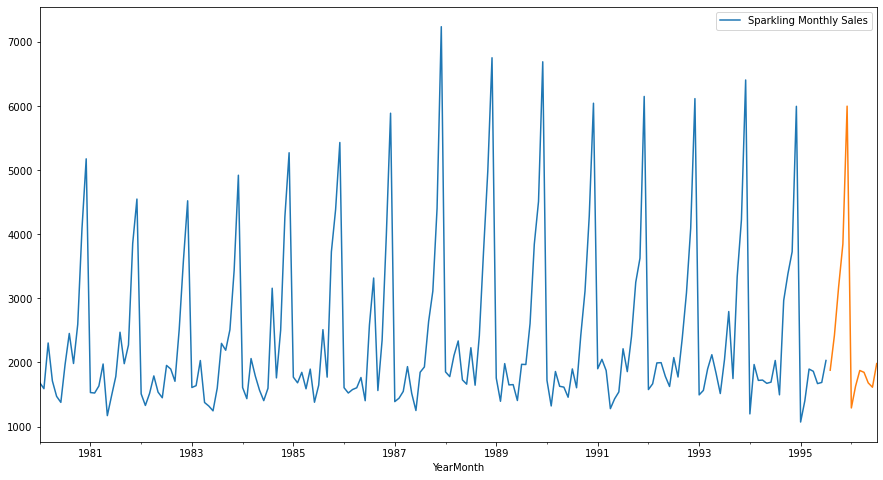

In [135]:
df.plot()
prediction.plot();

In [136]:
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
Prediction_TES = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(Full_Data_Model.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(Full_Data_Model.resid,ddof=1)})
Prediction_TES.head()

,lower_CI,prediction,upper_ci
1995-08-01,1178.686177,1879.024631,2579.363085
1995-09-01,1724.015253,2424.353706,3124.692160
1995-10-01,2484.811790,3185.150244,3885.488698
1995-11-01,3148.769149,3849.107603,4549.446057
1995-12-01,5301.041238,6001.379692,6701.718146


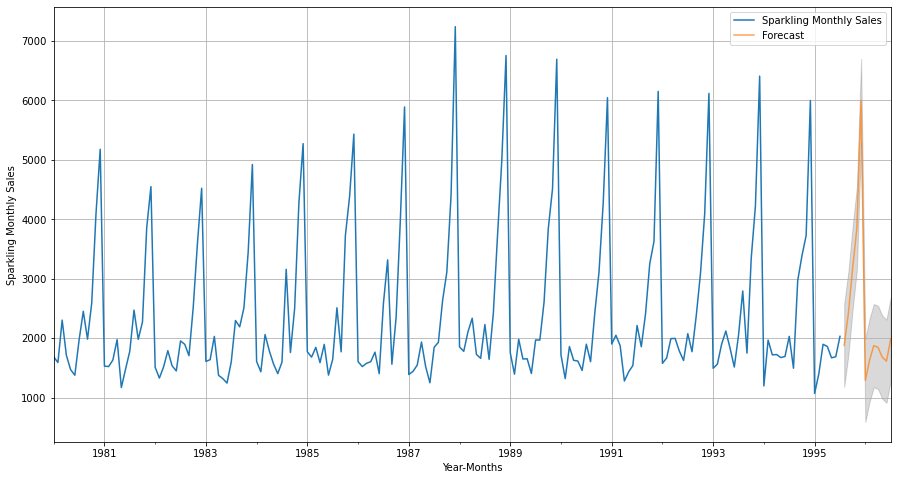

In [137]:
axis = df.plot(label='Actual', figsize=(15,8))
Prediction_TES['prediction'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(Prediction_TES.index, Prediction_TES['lower_CI'], Prediction_TES['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Monthly Sales')
plt.legend(loc='best')
plt.grid()
plt.show()